<a href="https://colab.research.google.com/github/SriRamK345/RetailSalses_Forecast/blob/main/Sales_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.ensemble import RandomForestRegressor

### Loading datasets

In [3]:
df_store = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/stores_data_set.csv")
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
df_sales = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/sales_data_set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
df_feature = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/Features_data_set.csv")
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_store.shape

(45, 3)

In [7]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [8]:
df_sales.shape

(421570, 5)

In [9]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
df_feature.shape

(8190, 12)

In [11]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### Combining Datasets

In [12]:
merged_df = pd.merge(df_store, df_sales, on='Store', how='outer')
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [13]:
merged_df.shape

(421570, 7)

In [14]:
merged_df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
df = pd.merge(merged_df, df_feature, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [16]:
# df.set_index('Date', inplace=True)
# df.head()

In [17]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (423325, 17)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [19]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

### Preparation for Exploratory Data Analysis(EDA)

In [22]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [23]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    393529
True      29796
Name: count, dtype: int64

In [24]:
df= df.drop(columns=['IsHoliday_x'])

# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [25]:
# check negative weekly_sales count
df[df['Weekly_Sales']<=0]

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
188,1,A,151315.0,47.0,19/02/2010,-863.00,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
406,1,A,151315.0,47.0,12/03/2010,-698.00,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
2549,1,A,151315.0,47.0,08/10/2010,-58.00,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False
3632,1,A,151315.0,54.0,21/01/2011,-50.00,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False
4132,1,A,151315.0,47.0,11/03/2011,0.00,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,B,118221.0,49.0,25/05/2012,-4.97,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False
420403,45,B,118221.0,49.0,29/06/2012,-34.00,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False
420736,45,B,118221.0,49.0,03/08/2012,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False
421007,45,B,118221.0,54.0,31/08/2012,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False


In [26]:
len(df[df['Weekly_Sales']<=0])

1358

In [27]:
# negative weekly_sales value convert to null value

df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
423320,45,NaN,NaN,NaN,28/06/2013,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
423324,45,NaN,NaN,NaN,26/07/2013,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [28]:
len(df.MarkDown1.unique())

4024

### Missing Values

In [29]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Store,0
Type,1755
Size,1755
Dept,1755
Date,0
Weekly_Sales,3113
Temperature,0
Fuel_Price,0
MarkDown1,270892
MarkDown2,310793


### Unique Values

In [30]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Store,45
Type,3
Size,40
Dept,81
Date,182
Weekly_Sales,358785
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715


In [31]:
df["Dept"].value_counts()

Dept
1.0     6435
16.0    6435
92.0    6435
38.0    6435
40.0    6435
        ... 
78.0     235
77.0     150
65.0     143
39.0      16
43.0      12
Name: count, Length: 81, dtype: int64

### Separating columns (Numeric or Categorical)

In [32]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [33]:
numeric_columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3",  "MarkDown4", "MarkDown5", "CPI", "Unemployment"]
category_columns = ["Store",  "Type", "Size","IsHoliday", "Dept"]

In [34]:
numeric_columns

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [35]:
# string_columns = df.select_dtypes(exclude=['int64',"float64"]).columns
# numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [36]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000
MarkDown4,136466.0,3382.019834,6306.728468,0.220,500.910000,1465.540000,3592.000000,67474.850000
MarkDown5,153187.0,4618.743783,6258.233496,-185.170,1863.720000,3340.020000,5535.130000,771448.100000
CPI,422740.0,171.218863,39.167088,126.064,132.022667,182.350989,212.512605,228.976456
Unemployment,422740.0,7.957296,1.863433,3.684,6.891000,7.866000,8.567000,14.313000


In [37]:
df.shape

(423325, 16)

In [38]:
df.IsHoliday.value_counts()

IsHoliday
False    393529
True      29796
Name: count, dtype: int64

In [39]:
# holiday_true_data = df[df['Holiday'] == 1]
# holiday_false_data = df[df['Holiday'] == 0]

In [40]:
print("Markdown1 =", df.MarkDown1.isnull().sum()/421570)
print("Markdown2 =", df.MarkDown2.isnull().sum()/421570)
print("Markdown3 =", df.MarkDown3.isnull().sum()/421570)
print("Markdown4 =", df.MarkDown4.isnull().sum()/421570)
print("Markdown5 =", df.MarkDown5.isnull().sum()/421570)

Markdown1 = 0.6425789311383637
Markdown2 = 0.737227506701141
Markdown3 = 0.6752544061484451
Markdown4 = 0.6804540171264558
Markdown5 = 0.6407903788220224


### Exploratory Data Analysis(EDA)

In [41]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales','CPI','Unemployment'], inplace=True)

In [42]:
def plot(df, column):

    sns.set_style("whitegrid") # Setting the style for seaborn

    plt.figure(figsize=(20, 5)) # Creating the figure with a specific size

    # Creating the first subplot for the box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}', fontsize=16,color ="red")
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Value', fontsize=14, color = 'darkblue')

    # Creating the second subplot for the distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, bins=50, kde = True)
    plt.title(f'Distribution Plot for {column}', fontsize=16, color = 'red')
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Frequency', fontsize=14, color = 'darkblue')

    # Adjusting the layout
    plt.tight_layout()

    # Displaying the plots
    plt.show()

In [43]:
# for i in numeric_columns:
#   plot(df, i)

df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


### Analyzing Categorical Variables

In [44]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

In [45]:
# encoding for catagorical features into numerical
df['IsHoliday'] = df['IsHoliday'].map({True:1, False:0})
df['Type'] = df['Type'].map({'A':1, 'B':2, 'C':3})

In [46]:
df[category_columns].corr()

,Store,Type,Size,IsHoliday,Dept
Store,1.000000,0.226352,-0.182763,-0.000522,0.024258
Type,0.226352,1.000000,-0.811541,-0.001000,0.003157
Size,-0.182763,-0.811541,1.000000,0.000797,-0.002491
IsHoliday,-0.000522,-0.001000,0.000797,1.000000,0.000663
Dept,0.024258,0.003157,-0.002491,0.000663,1.000000


In [47]:
len(df["Size"].value_counts())

40

In [48]:
len(df["Dept"].value_counts())

81

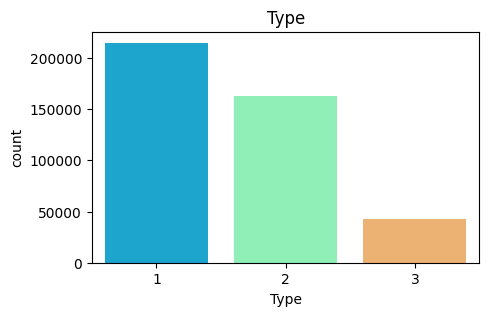

In [49]:
plt.figure(figsize = (5,3))
sns.countplot(x="Type", data = df, palette = "rainbow")
plt.title("Type")
plt.show()

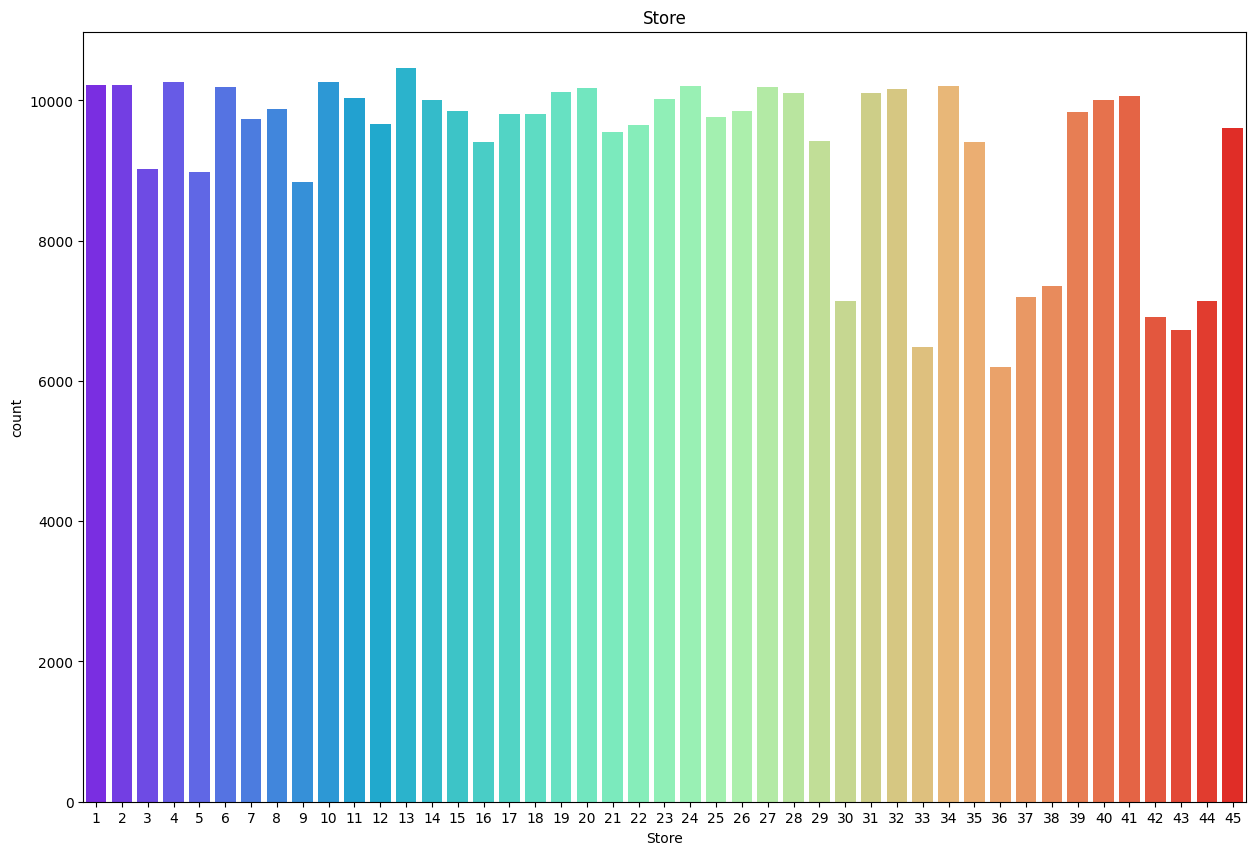

In [50]:
plt.figure(figsize = (15,10))
sns.countplot(x="Store", data = df, palette = "rainbow")
plt.title("Store")
plt.show()

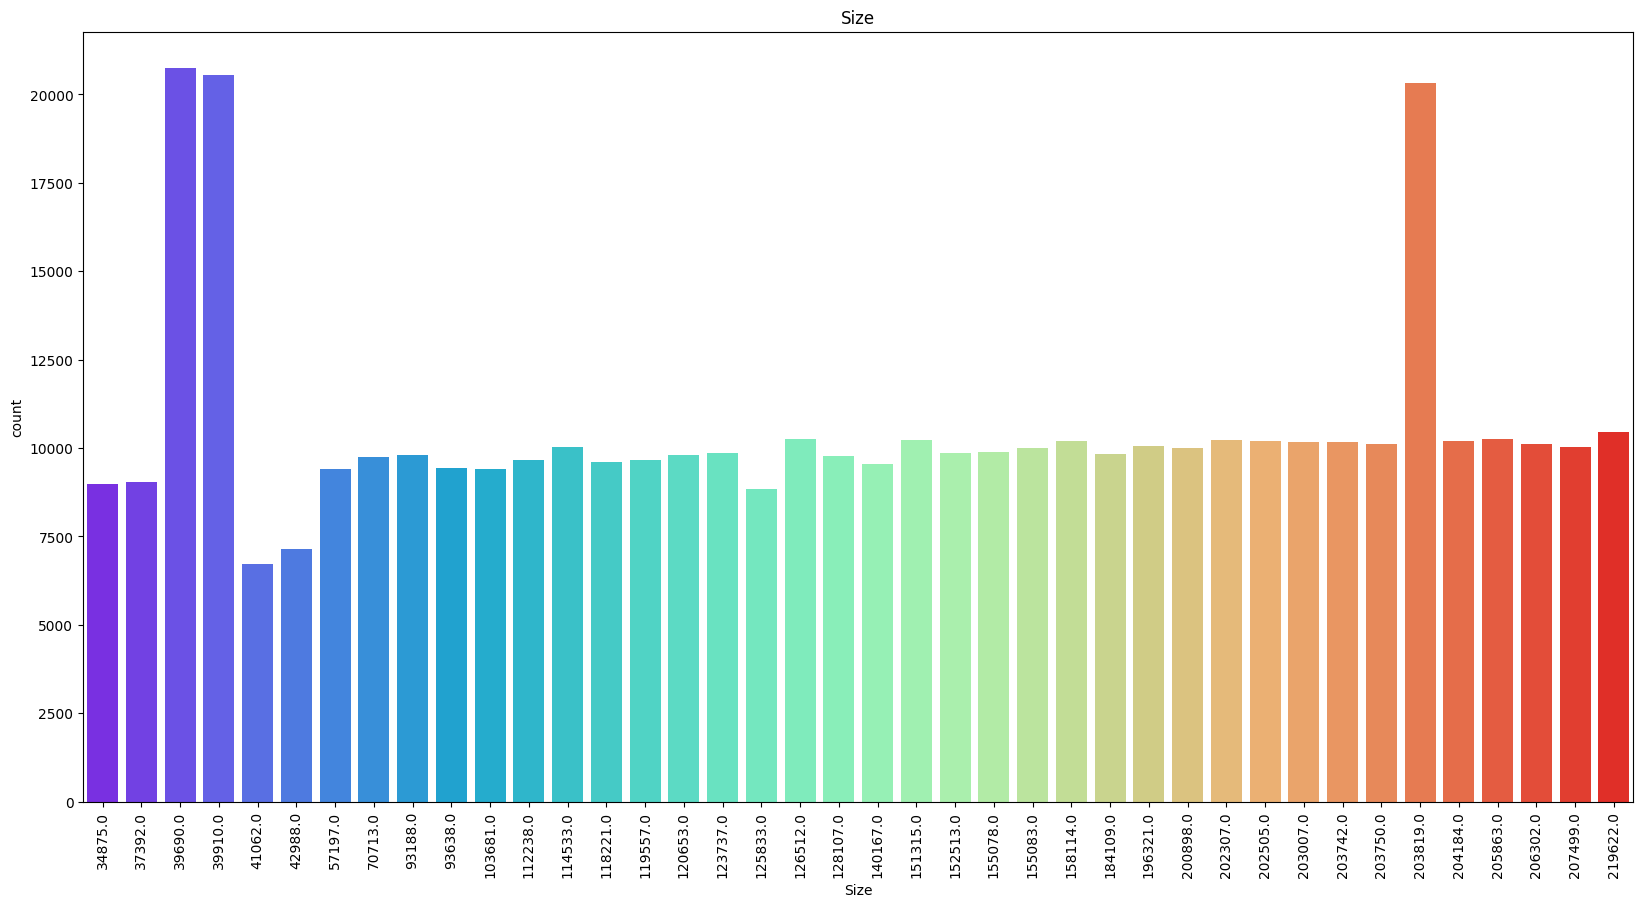

In [51]:
plt.figure(figsize = (20,10))
sns.countplot(x="Size", data = df, palette = "rainbow",)
plt.title("Size")
plt.xticks(rotation = 90)
plt.show()

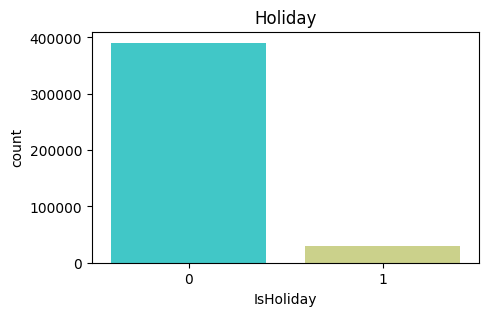

In [52]:
plt.figure(figsize = (5,3))
sns.countplot(x="IsHoliday", data = df, palette = "rainbow")
plt.title("Holiday")
plt.show()

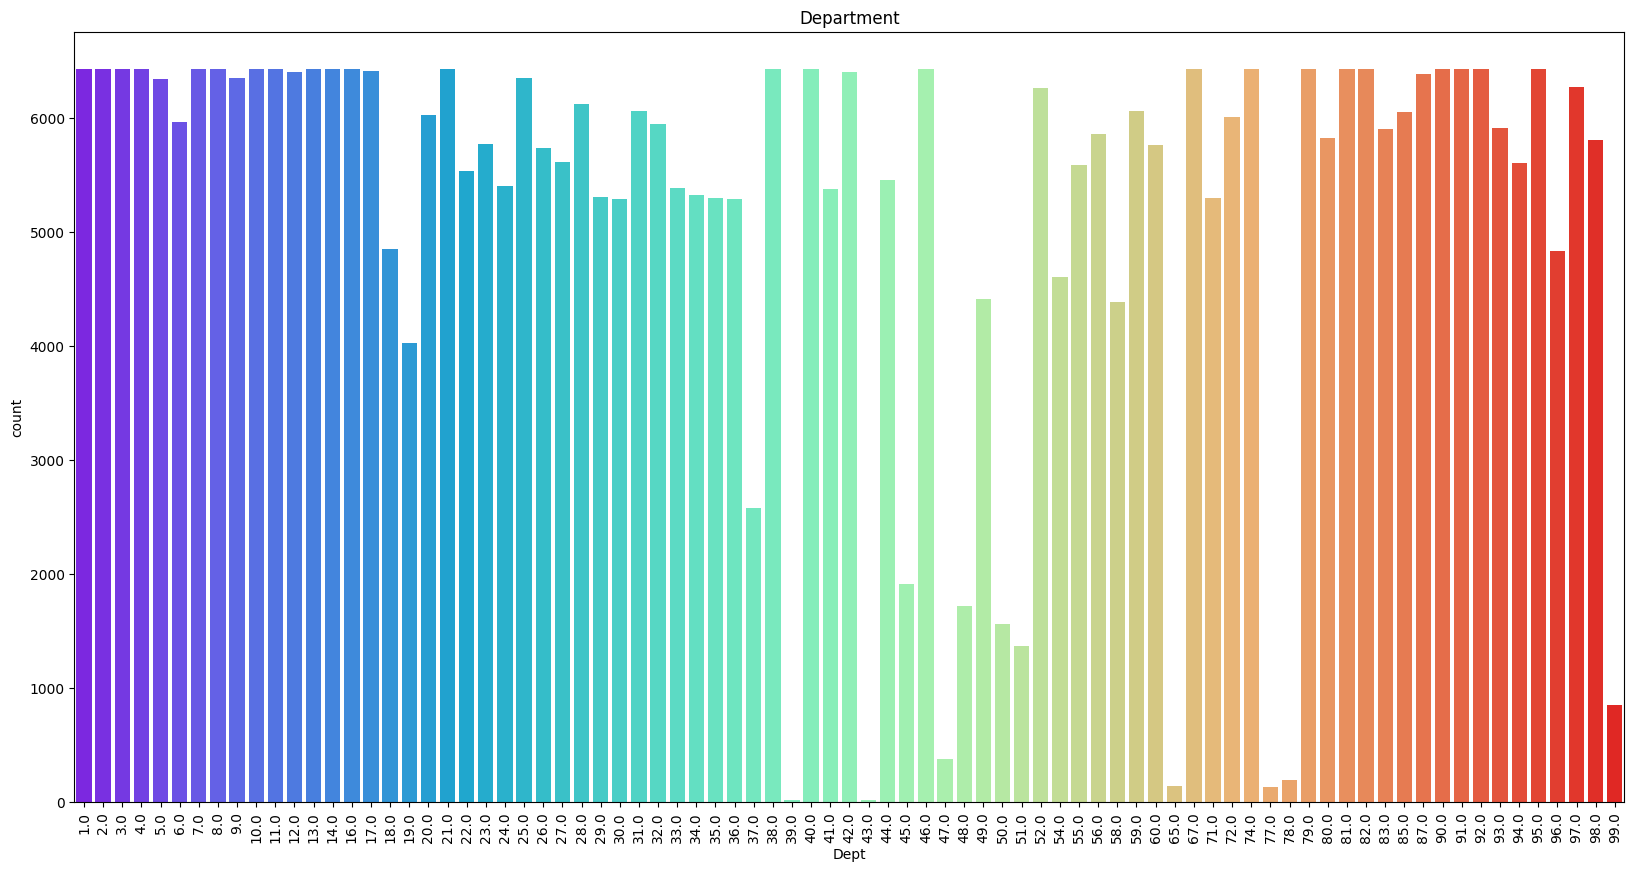

In [53]:
plt.figure(figsize = (20,10))
sns.countplot(x="Dept", data = df, palette = "rainbow")
plt.title("Department")
plt.xticks(rotation = 90)
plt.show()

### Bi-variate Analysis

In [54]:
numeric_columns

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [55]:
df[numeric_columns].corr()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Weekly_Sales,1.000000,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806
Temperature,-0.002339,1.000000,0.143700,-0.040498,-0.323891,-0.096843,-0.063955,-0.017616,0.182223,0.096768
Fuel_Price,0.000089,0.143700,1.000000,0.061302,-0.220680,-0.102146,-0.045033,-0.128017,-0.164199,-0.033915
MarkDown1,0.085325,-0.040498,0.061302,1.000000,0.024601,-0.108189,0.819175,0.160412,-0.055522,0.050103
MarkDown2,0.024565,-0.323891,-0.220680,0.024601,1.000000,-0.050146,-0.007582,-0.007410,-0.039782,0.020839
MarkDown3,0.060304,-0.096843,-0.102146,-0.108189,-0.050146,1.000000,-0.071148,-0.026475,-0.023820,0.012866
MarkDown4,0.045325,-0.063955,-0.045033,0.819175,-0.007582,-0.071148,1.000000,0.107895,-0.049693,0.024919
MarkDown5,0.090561,-0.017616,-0.128017,0.160412,-0.007410,-0.026475,0.107895,1.000000,0.060375,-0.003834
CPI,-0.021162,0.182223,-0.164199,-0.055522,-0.039782,-0.023820,-0.049693,0.060375,1.000000,-0.299887
Unemployment,-0.025806,0.096768,-0.033915,0.050103,0.020839,0.012866,0.024919,-0.003834,-0.299887,1.000000


In [56]:
# graph = sns.pairplot(df[numeric_columns], diag_kind = "kde")
# plt.show()

In [57]:
# # Use 'col' and 'row' instead of 'x' and 'y'
# sns.FacetGrid(col = 'Temperature', row = 'Weekly_Sales', data = df, palette = 'rainbow')
# plt.show()

In [58]:
# sns.Facegrid

In [59]:
# category_columns.append("Weekly_Sales")

In [60]:
# for i in category_columns:
#   sns.countplot(x=i, data = df[category_columns], hue = "Weekly_Sales")
#   plt.show()

In [61]:
# category_columns.pop("Weekly_Sales")

In [62]:
# for i in numeric_columns:
#     graph = sns.FacetGrid(df, hue = "Weekly_Sales", height = 5)
#     graph.map(sns.kdeplot, i, shade = True)
#     graph.add_legend()
#     plt.tight_layout()

In [63]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df['Markdown'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown
0,1,1,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0
1,1,1,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0
2,1,1,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0
3,1,1,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0
4,1,1,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0


In [64]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df.groupby('Markdown')['Weekly_Sales'].mean()

Markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [65]:
# Reset the index of your DataFrame to ensure unique index values
#df = df.reset_index()
#
# for i in MarkDown:
#   plot(df, i)

In [66]:
# df.set_index("Date")
# df.head()

In [67]:
# # make Date feature into --> Day,Month,Year new features and drop Date column
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010


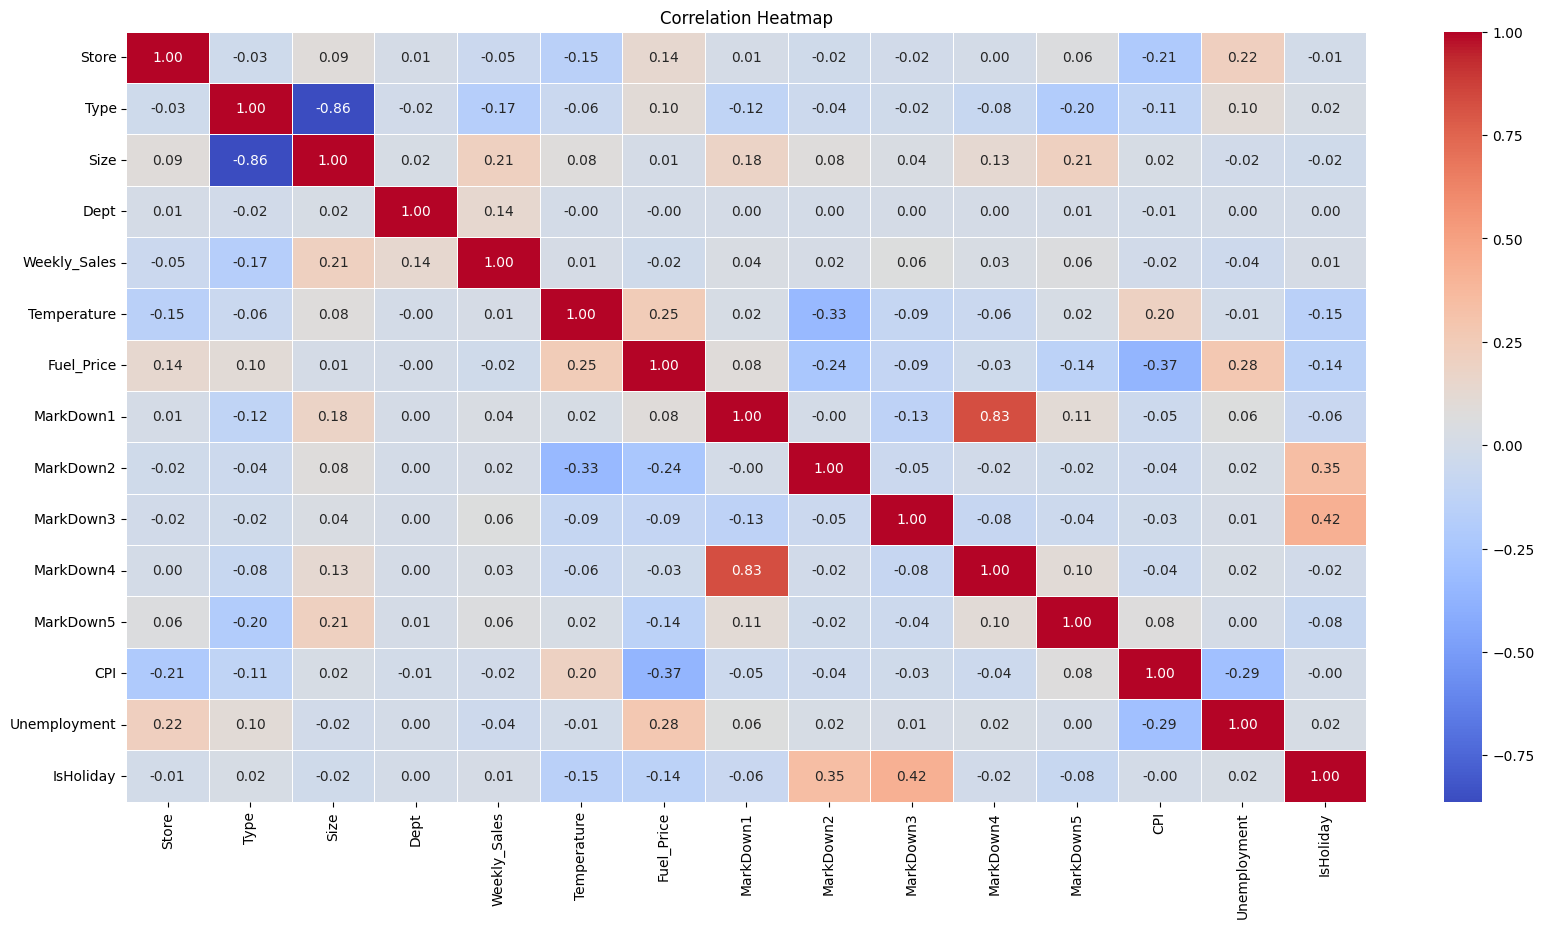

In [68]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [69]:
# in heatmap shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.

In [70]:
df2 = df.copy()
df2.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,5,2,2010


In [71]:
# Replace null values with median

df2.MarkDown1.fillna(df2.MarkDown1.median(), inplace=True)
df2.MarkDown2.fillna(df2.MarkDown2.median(), inplace=True)
df2.MarkDown3.fillna(df2.MarkDown3.median(), inplace=True)
df2.MarkDown4.fillna(df2.MarkDown4.median(), inplace=True)
df2.MarkDown5.fillna(df2.MarkDown5.median(), inplace=True)

In [72]:
# for i in MarkDown:
#   plot(df2, i)

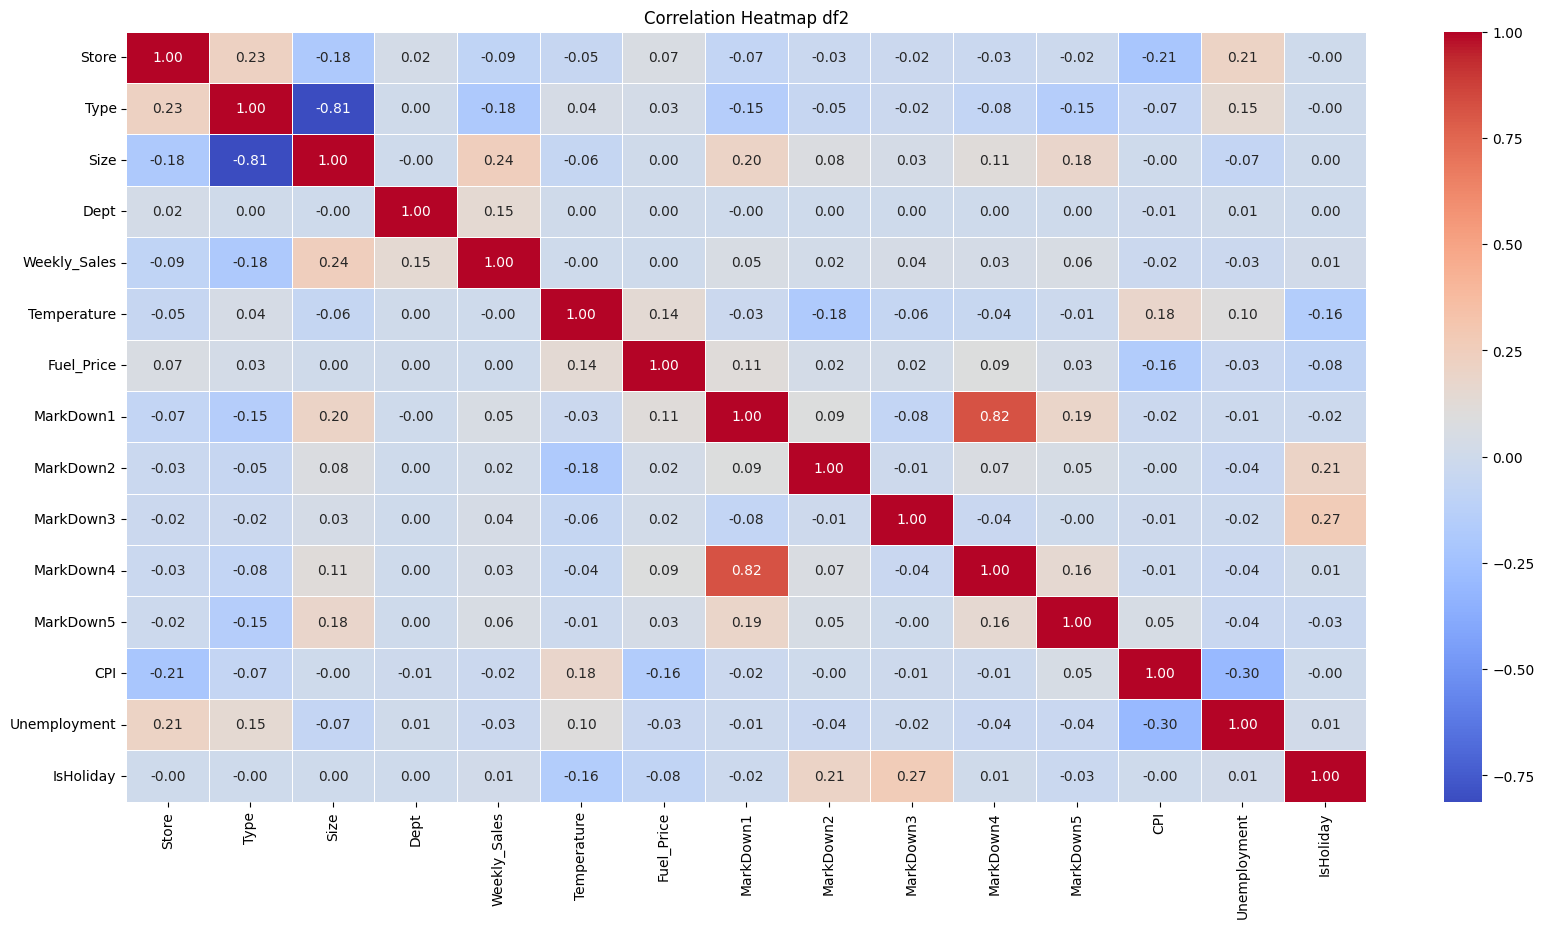

In [73]:
# Calculate the correlation matrix
df2_corr = df2.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df2_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap df2")
plt.show()

In [74]:
# No difference in corelation matrix after replacing maekdown column to median values

### Implementing ML techinique in df to predict null values in Markdown columns

In [75]:
#Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)
MarkDown = ['MarkDown1', 'MarkDown2', 'MarkDown3',  'MarkDown4', 'MarkDown5']

Columns with null values: Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')


In [76]:
# Features to use for prediction (all columns except the MarkDown columns)
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']

for target in MarkDown:
    # Split the data into training and prediction sets for the current MarkDown column
    train_df = df[df[target].notnull()]
    predict_df = df[df[target].isnull()]

    # Features and target
    X_train = train_df[features]
    y_train = train_df[target]
    X_predict = predict_df[features]

    # Initialize the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_predict)

    # Fill the missing values in the original DataFrame
    df.loc[df[target].isnull(), target] = predicted_values

df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010


In [77]:
# for i in numeric_columns:
#   plot(df, i)

In [78]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

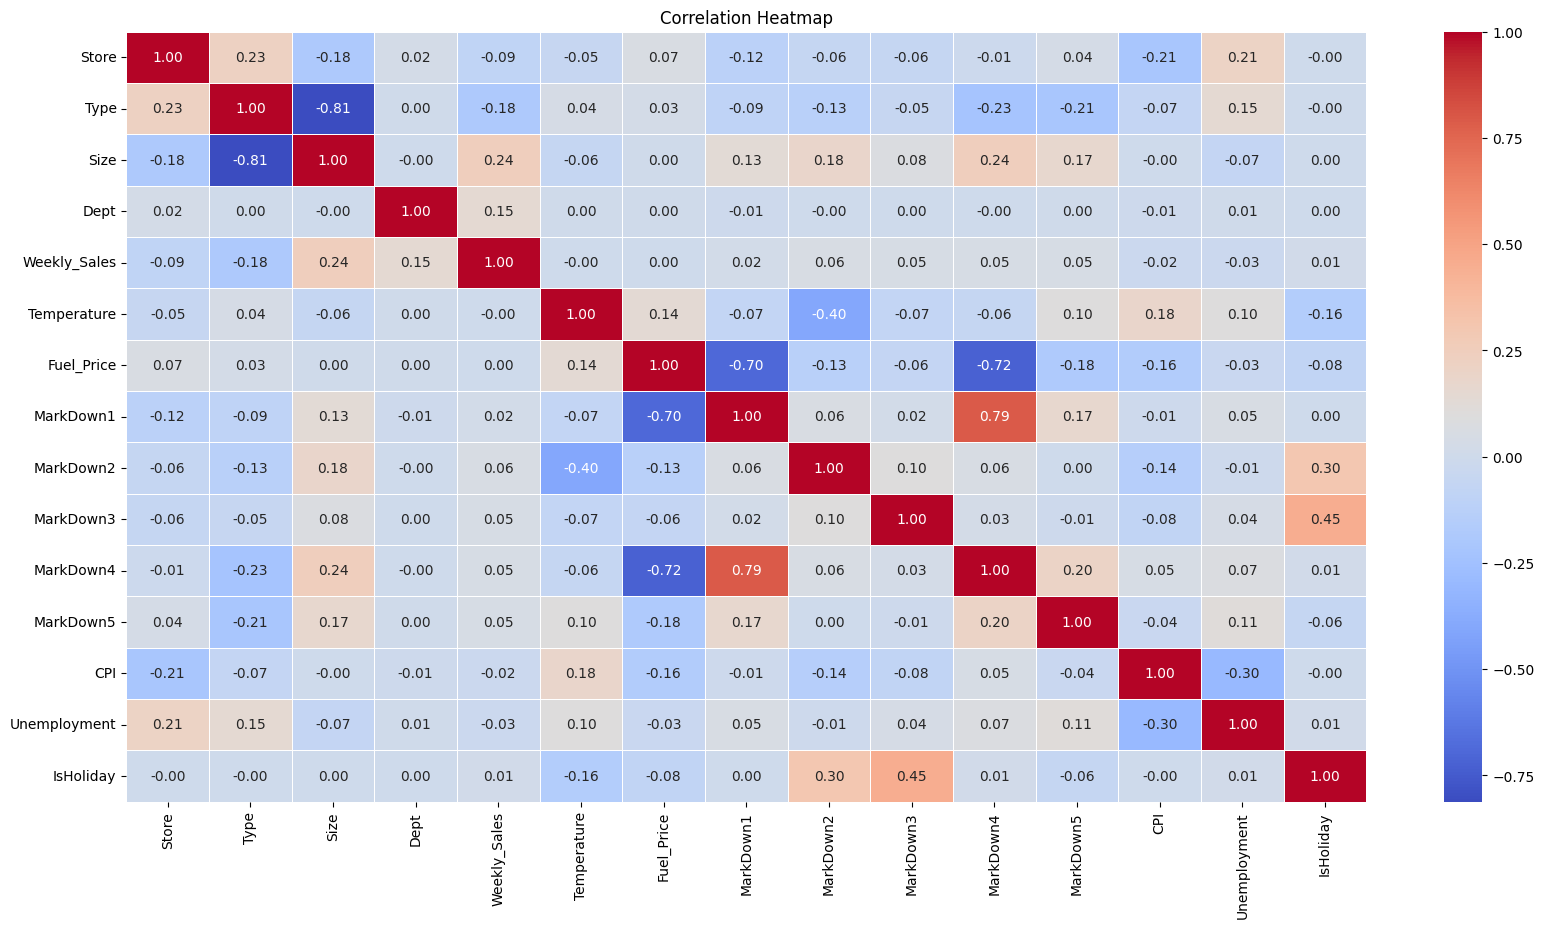

In [79]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['Day', 'Month', 'Year','Markdown']).dropna().corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [80]:
# holiday_true_data = df[df['IsHoliday'] == 1]
# holiday_false_data = df[df['IsHoliday'] == 0]

In [81]:
# plt.figure(figsize=(20,10))
# sns.heatmap(holiday_true_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
# plt.show()

In [82]:
# plt.figure(figsize=(20,10))
# sns.heatmap(holiday_false_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
# plt.show()

### Preparation for Modeling

In [83]:
#  Dropping Columns with Low Correlation


In [84]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

In [85]:
numeric_columns

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [86]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Markdown        0
Day             0
Month           0
Year            0
dtype: int64

In [87]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010


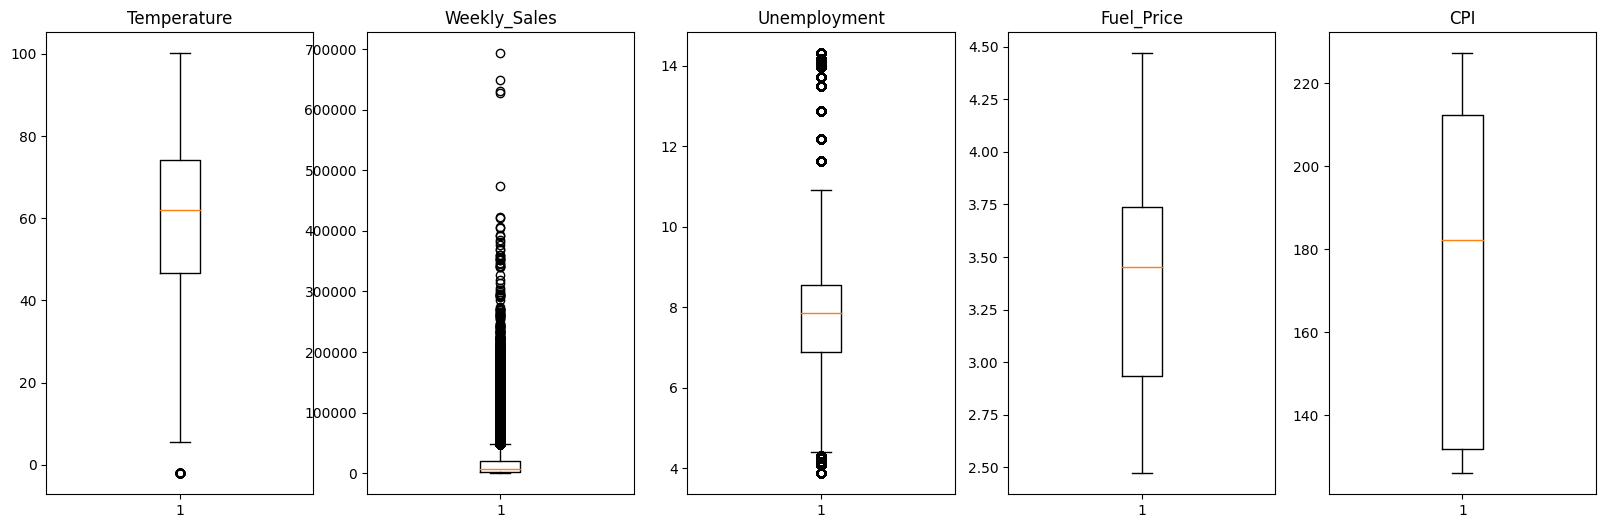

In [88]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.boxplot(df["Temperature"])
ax1.set_title("Temperature")

ax2.boxplot(df["Weekly_Sales"])
ax2.set_title("Weekly_Sales")

ax3.boxplot(df["Unemployment"])
ax3.set_title("Unemployment")

ax4.boxplot(df["Fuel_Price"])
ax4.set_title("Fuel_Price")

ax5.boxplot(df["CPI"])
ax5.set_title("CPI")

plt.show()

In [89]:
df["Weekly_Sales"].describe()

count    420212.000000
mean      16033.114591
std       22729.492116
min           0.010000
25%        2120.130000
50%        7661.700000
75%       20271.265000
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [90]:
# Calculate the z-scores for each column
from scipy.stats import zscore

# Assuming df and numeric_columns are defined
for column in numeric_columns:
    # Compute z-scores for the current column once
    z_scores = zscore(df[column])

    # Iterate over the threshold values and count the number of outliers
    for threshold in range(1, 4):
        outliers = np.abs(z_scores) > threshold
        num_outliers = np.sum(outliers)

        print(f"Column Name: {column}")
        print(f"Threshold Value: {threshold}")
        print(f"Number of Outliers: {num_outliers}")
        print("-------------------")

Column Name: Weekly_Sales
Threshold Value: 1
Number of Outliers: 49147
-------------------
Column Name: Weekly_Sales
Threshold Value: 2
Number of Outliers: 20836
-------------------
Column Name: Weekly_Sales
Threshold Value: 3
Number of Outliers: 8805
-------------------
Column Name: Temperature
Threshold Value: 1
Number of Outliers: 148153
-------------------
Column Name: Temperature
Threshold Value: 2
Number of Outliers: 11835
-------------------
Column Name: Temperature
Threshold Value: 3
Number of Outliers: 67
-------------------
Column Name: Fuel_Price
Threshold Value: 1
Number of Outliers: 171724
-------------------
Column Name: Fuel_Price
Threshold Value: 2
Number of Outliers: 2144
-------------------
Column Name: Fuel_Price
Threshold Value: 3
Number of Outliers: 0
-------------------
Column Name: MarkDown1
Threshold Value: 1
Number of Outliers: 125038
-------------------
Column Name: MarkDown1
Threshold Value: 2
Number of Outliers: 20243
-------------------
Column Name: MarkDow

In [91]:
def iqr(df, column_name):
    q1 = np.quantile(df[column_name], 0.25)
    q3 = np.quantile(df[column_name], 0.75)
    diff = q3 - q1
    lower_threshold  = q1 - (1.5 * diff)
    upper_threshold  = q3 + (1.5 * diff)
    print("Lower Threshold:", lower_threshold)
    print("Upper Threshold:", upper_threshold)
    return df[(df[column_name] < lower_threshold) | (df[column_name] > upper_threshold)]

In [92]:
Temperature = iqr(df, "Temperature")
Temperature

Lower Threshold: 5.279999999999994
Upper Threshold: 115.68


,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
62553,7,2,70713.0,1.0,8976.04,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62554,7,2,70713.0,2.0,21568.46,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62555,7,2,70713.0,3.0,7555.18,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62556,7,2,70713.0,4.0,15306.89,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62557,7,2,70713.0,5.0,12835.06,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62616,7,2,70713.0,93.0,1170.19,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62618,7,2,70713.0,95.0,33881.30,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62619,7,2,70713.0,96.0,1412.71,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011
62620,7,2,70713.0,97.0,4601.19,-2.06,3.011,56917.7,3921.9019,44.0302,16241.73,2009.7745,191.762589,8.818,0,0,4,2,2011


In [93]:
Weekly_Sales = iqr(df, "Weekly_Sales")
Weekly_Sales

Lower Threshold: -25106.5725
Upper Threshold: 47497.9675


,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
36,1,1,151315.0,38.0,115564.35,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
37,1,1,151315.0,40.0,66780.63,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
56,1,1,151315.0,72.0,98499.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
65,1,1,151315.0,90.0,76419.47,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421497,45,2,118221.0,92.0,48108.38,56.47,3.969,2004.0200,43.2467,3.1800,437.7300,1537.4900,192.330854,8.667,0,1,19,10,2012
421500,45,2,118221.0,95.0,48434.97,56.47,3.969,2004.0200,43.2467,3.1800,437.7300,1537.4900,192.330854,8.667,0,1,19,10,2012
421538,45,2,118221.0,38.0,47799.07,58.85,3.882,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667,0,1,26,10,2012
421564,45,2,118221.0,92.0,54608.75,58.85,3.882,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667,0,1,26,10,2012


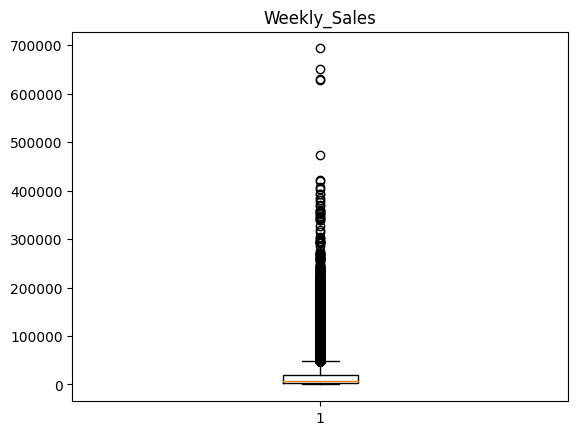

In [94]:
plt.boxplot(df["Weekly_Sales"])
plt.title("Weekly_Sales")
plt.show()

In [95]:
len(df[df["Weekly_Sales"] >= 250000])

62

In [96]:
dropped_rows = df[df["Weekly_Sales"] >= 250000].index
df.drop(dropped_rows, inplace=True)

In [97]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,12190.7745,211.096358,8.106,0,0,5,2,2010


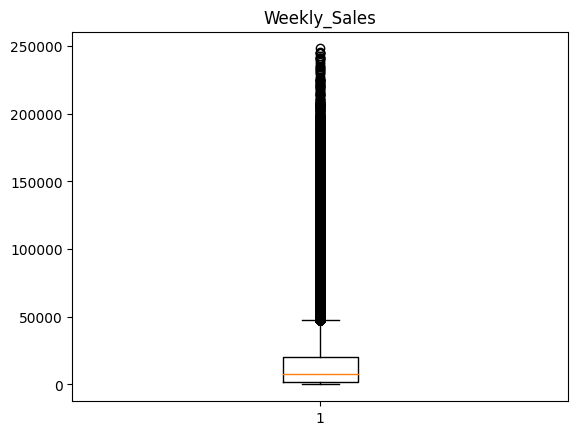

In [98]:
plt.boxplot(df["Weekly_Sales"])
plt.title("Weekly_Sales")
plt.show()

In [99]:
Unemployment = iqr(df, "Unemployment")
Unemployment

Lower Threshold: 4.377
Upper Threshold: 11.081


,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year
37630,4,1,205863.0,1.0,85839.78,67.69,3.864,11341.17,586.3192,73.38,5677.89,7821.95,131.037548,4.308,0,1,6,4,2012
37631,4,1,205863.0,2.0,104332.33,67.69,3.864,11341.17,586.3192,73.38,5677.89,7821.95,131.037548,4.308,0,1,6,4,2012
37632,4,1,205863.0,3.0,12334.33,67.69,3.864,11341.17,586.3192,73.38,5677.89,7821.95,131.037548,4.308,0,1,6,4,2012
37633,4,1,205863.0,4.0,64551.09,67.69,3.864,11341.17,586.3192,73.38,5677.89,7821.95,131.037548,4.308,0,1,6,4,2012
37634,4,1,205863.0,5.0,52309.26,67.69,3.864,11341.17,586.3192,73.38,5677.89,7821.95,131.037548,4.308,0,1,6,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380967,40,1,155083.0,94.0,32845.06,49.65,3.917,3605.71,55.9800,0.28,486.81,1389.06,138.728161,4.145,0,1,26,10,2012
380968,40,1,155083.0,95.0,61950.15,49.65,3.917,3605.71,55.9800,0.28,486.81,1389.06,138.728161,4.145,0,1,26,10,2012
380969,40,1,155083.0,96.0,12911.09,49.65,3.917,3605.71,55.9800,0.28,486.81,1389.06,138.728161,4.145,0,1,26,10,2012
380970,40,1,155083.0,97.0,15555.73,49.65,3.917,3605.71,55.9800,0.28,486.81,1389.06,138.728161,4.145,0,1,26,10,2012


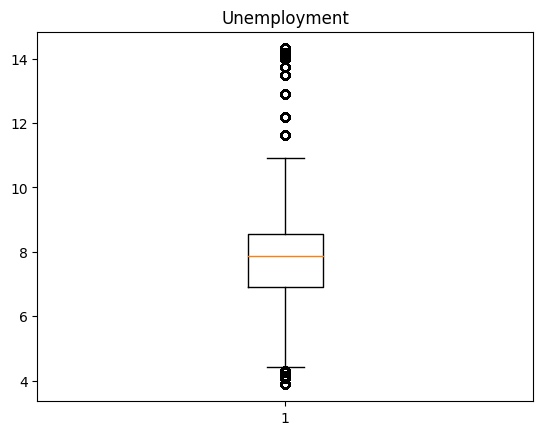

In [100]:
plt.boxplot(df["Unemployment"])
plt.title("Unemployment")
plt.show()

In [101]:
df[df["Unemployment"] >= 11].Unemployment.max()

14.313

In [102]:
len(df[df["Unemployment"] >= 13])

16368

### Determining Distributions of Numeric Variables

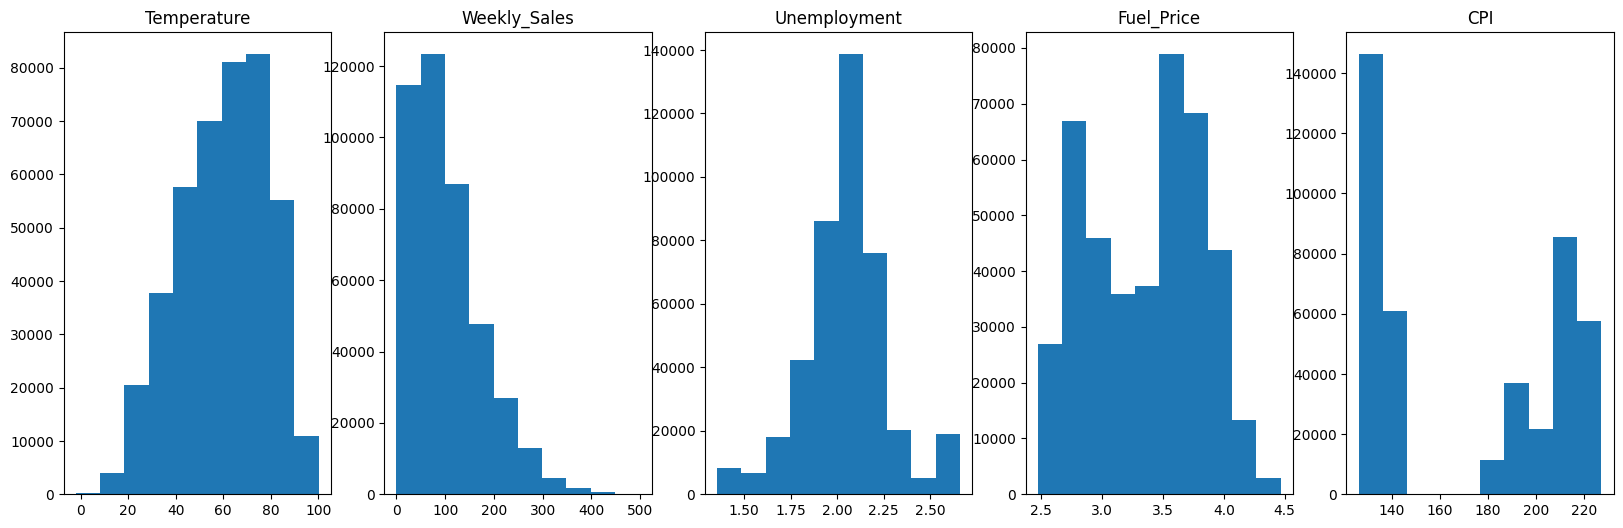

In [129]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.hist(df["Temperature"])
ax1.set_title("Temperature")

ax2.hist(df["Weekly_Sales"])
ax2.set_title("Weekly_Sales")

ax3.hist(df["Unemployment"])
ax3.set_title("Unemployment")

ax4.hist(df["Fuel_Price"])
ax4.set_title("Fuel_Price")

ax5.hist(df["CPI"])
ax5.set_title("CPI")

plt.show()

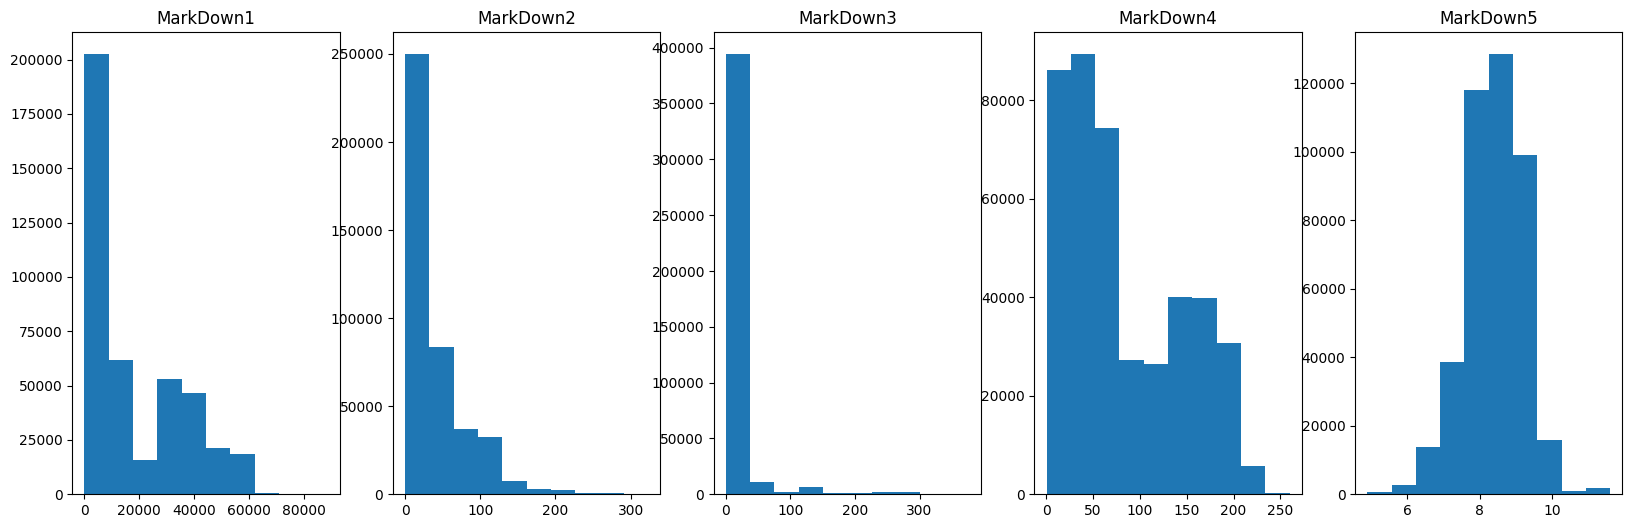

In [128]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.hist(df["MarkDown1"])
ax1.set_title("MarkDown1")

ax2.hist(df["MarkDown2"])
ax2.set_title("MarkDown2")

ax3.hist(df["MarkDown3"])
ax3.set_title("MarkDown3")

ax4.hist(df["MarkDown4"])
ax4.set_title("MarkDown4")

ax5.hist(df["MarkDown5"])
ax5.set_title("MarkDown5")

plt.show()

In [105]:
# Skew

df[['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']].agg(["skew"]).transpose()

,skew
Weekly_Sales,2.833530
Temperature,-0.321494
Fuel_Price,-0.104773
MarkDown1,0.806067
MarkDown2,5.864418
MarkDown3,8.758661
MarkDown4,1.100434
MarkDown5,7.951409
CPI,0.084591
Unemployment,1.183749


In [106]:
df["Weekly_Sales_log"] = np.log(df["Weekly_Sales"])
df["Weekly_Sales_sqrt"] = np.sqrt(df["Weekly_Sales"])

In [107]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday,Markdown,Day,Month,Year,Weekly_Sales_log,Weekly_Sales_sqrt
0,1,1,151315.0,1.0,24924.50,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,0,5,2,2010,10.123607,157.874951
1,1,1,151315.0,2.0,50605.27,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,0,5,2,2010,10.831811,224.956151
2,1,1,151315.0,3.0,13740.12,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,0,5,2,2010,9.528075,117.218258
3,1,1,151315.0,4.0,39954.04,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,0,5,2,2010,10.595485,199.885067
4,1,1,151315.0,5.0,32229.38,42.31,2.572,39120.6279,2641.4909,391.3485,...,12190.7745,211.096358,8.106,0,0,5,2,2010,10.380634,179.525430


In [108]:
df[["Weekly_Sales", "Weekly_Sales_log", "Weekly_Sales_sqrt"]].agg(["skew"]).transpose()

,skew
Weekly_Sales,2.833530
Weekly_Sales_log,-1.307200
Weekly_Sales_sqrt,1.031556


In [109]:
df.drop(columns=["Weekly_Sales", "Weekly_Sales_log"], inplace=True)

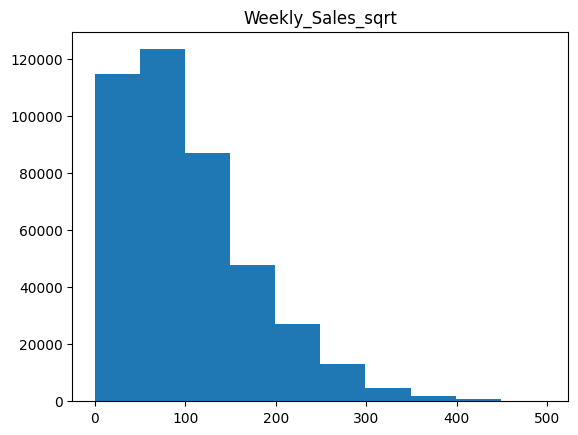

In [110]:
plt.hist(df["Weekly_Sales_sqrt"])
plt.title("Weekly_Sales_sqrt")
plt.show()

In [111]:
df["MarkDown2_log"] = np.log(df["MarkDown2"])
df["MarkDown2_sqrt"] = np.sqrt(df["MarkDown2"])

df["MarkDown3_log"] = np.log(df["MarkDown3"])
df["MarkDown3_sqrt"] = np.sqrt(df["MarkDown3"])

df["MarkDown4_log"] = np.log(df["MarkDown4"])
df["MarkDown4_sqrt"] = np.sqrt(df["MarkDown4"])

df["MarkDown5_log"] = np.log(df["MarkDown5"])
df["MarkDown5_sqrt"] = np.sqrt(df["MarkDown5"])

df["Unemployment_log"] = np.log(df["Unemployment"])
df["Unemployment_sqrt"] = np.sqrt(df["Unemployment"])

In [112]:
df.head()

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,MarkDown2_log,MarkDown2_sqrt,MarkDown3_log,MarkDown3_sqrt,MarkDown4_log,MarkDown4_sqrt,MarkDown5_log,MarkDown5_sqrt,Unemployment_log,Unemployment_sqrt
0,1,1,151315.0,1.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
1,1,1,151315.0,2.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
2,1,1,151315.0,3.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
3,1,1,151315.0,4.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104
4,1,1,151315.0,5.0,42.31,2.572,39120.6279,2641.4909,391.3485,36151.2189,...,7.879099,51.395437,5.969598,19.78253,10.495466,190.134739,9.408435,110.41184,2.092605,2.847104


In [113]:
df[["MarkDown2", "MarkDown2_log", "MarkDown2_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown2,5.864418
MarkDown2_log,NaN
MarkDown2_sqrt,1.966246


In [114]:
df[["MarkDown3", "MarkDown3_log", "MarkDown3_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown3,8.758661
MarkDown3_log,NaN
MarkDown3_sqrt,5.530663


In [115]:
df[["MarkDown4", "MarkDown4_log", "MarkDown4_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown4,1.100434
MarkDown4_log,-0.869155
MarkDown4_sqrt,0.550825


In [116]:
df[["MarkDown5", "MarkDown5_log", "MarkDown5_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown5,7.951409
MarkDown5_log,-0.246129
MarkDown5_sqrt,2.303763


In [117]:
df[["Unemployment", "Unemployment_log", "Unemployment_sqrt"]].agg(["skew"]).transpose()

,skew
Unemployment,1.183749
Unemployment_log,0.071939
Unemployment_sqrt,0.635108


In [118]:
df.drop(columns=["MarkDown2", "MarkDown2_log","MarkDown3", "MarkDown3_log","MarkDown4","MarkDown4_log","MarkDown5", "MarkDown5_sqrt","Unemployment","Unemployment_sqrt"], inplace=True)

In [119]:
df.head()

,Store,Type,Size,Dept,Temperature,Fuel_Price,MarkDown1,CPI,IsHoliday,Markdown,Day,Month,Year,Weekly_Sales_sqrt,MarkDown2_sqrt,MarkDown3_sqrt,MarkDown4_sqrt,MarkDown5_log,Unemployment_log
0,1,1,151315.0,1.0,42.31,2.572,39120.6279,211.096358,0,0,5,2,2010,157.874951,51.395437,19.78253,190.134739,9.408435,2.092605
1,1,1,151315.0,2.0,42.31,2.572,39120.6279,211.096358,0,0,5,2,2010,224.956151,51.395437,19.78253,190.134739,9.408435,2.092605
2,1,1,151315.0,3.0,42.31,2.572,39120.6279,211.096358,0,0,5,2,2010,117.218258,51.395437,19.78253,190.134739,9.408435,2.092605
3,1,1,151315.0,4.0,42.31,2.572,39120.6279,211.096358,0,0,5,2,2010,199.885067,51.395437,19.78253,190.134739,9.408435,2.092605
4,1,1,151315.0,5.0,42.31,2.572,39120.6279,211.096358,0,0,5,2,2010,179.525430,51.395437,19.78253,190.134739,9.408435,2.092605


In [120]:
df.rename(columns={"Weekly_Sales_sqrt": "Weekly_Sales","MarkDown2_sqrt": "MarkDown2","MarkDown3_sqrt": "MarkDown3","MarkDown4_sqrt": "MarkDown4","MarkDown5_log": "MarkDown5","Unemployment_log": "Unemployment"}, inplace=True)

In [121]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'CPI', 'IsHoliday', 'Markdown', 'Day', 'Month', 'Year',
       'Weekly_Sales', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Unemployment'],
      dtype='object')

In [123]:
df = df[['Day','Month','Year','Store','Dept','Type','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment','Weekly_Sales']]
df.tail()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
421565,26,10,2012,45,93.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,49.877851
421566,26,10,2012,45,94.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,72.133973
421567,26,10,2012,45,95.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,236.680101
421568,26,10,2012,45,97.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,82.568033
421569,26,10,2012,45,98.0,2,118221.0,0,58.85,3.882,4018.91,7.621024,10.0,14.558159,6.754989,192.308899,2.159523,32.814631


In [124]:
df[['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']].agg(["skew"]).transpose()

,skew
Weekly_Sales,1.031556
Temperature,-0.321494
Fuel_Price,-0.104773
MarkDown1,0.806067
MarkDown2,1.966246
MarkDown3,5.530663
MarkDown4,0.550825
MarkDown5,-0.246129
CPI,0.084591
Unemployment,0.071939


###  Scaling with the StandardScaler Method for Machine Learning Algorithms

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [140]:
scaler_df.head()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,-1.219345,-1.371894,-1.215359,-1.657605,-1.417264,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.271364,0.02671,1.681679,1.260649,1.018367,0.194551,0.747976
1,-1.219345,-1.371894,-1.215359,-1.657605,-1.384487,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.271364,0.02671,1.681679,1.260649,1.018367,0.194551,1.648668
2,-1.219345,-1.371894,-1.215359,-1.657605,-1.351710,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.271364,0.02671,1.681679,1.260649,1.018367,0.194551,0.202083
3,-1.219345,-1.371894,-1.215359,-1.657605,-1.318932,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.271364,0.02671,1.681679,1.260649,1.018367,0.194551,1.312042
4,-1.219345,-1.371894,-1.215359,-1.657605,-1.286155,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.271364,0.02671,1.681679,1.260649,1.018367,0.194551,1.038675


In [141]:
scaler_df.isnull().sum()

Day                0
Month              0
Year               0
Store              0
Dept               0
Type               0
Size               0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2       2287
MarkDown3        256
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
Weekly_Sales       0
dtype: int64

In [142]:
scaler_df.dropna(inplace=True)

### Separating Data into Test and Training Set

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x = scaler_df.drop(columns=["Weekly_Sales"])
y = scaler_df["Weekly_Sales"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [152]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 313205
X_test: 104402
y_train: 313205
y_test: 104402


### Modelling

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error # import a suitable metric for regression

RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # calculate mean squared error
print(f"Mean Squared Error: {mse}") # print the result

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluate model performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(metrics)